# Plots
The following file if executed allow to generate all the plots for the FID distance on the AE-StyleGAN, in this way we can see the effect of the different parameters on the training network.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot(title, x_arrays, y_arrays, labels, 
         colors=None, linestyles=None, markers=None, *, xlabel="", ylabel="", filename=None, legend_position="best", baseline=None, baseline_label=None, limit=5, encoder=False, **plot_args):
    """
    Plot the data and create the plot image.
    For the 2 different FID first call one time for sample and later for rec
    Parameters
    ----------
    title: string, name of the plot
    x: array, x values
    y_arrays: list of array, differents series of data to plot
    labels: list, names of the data series
    """
    plt.figure()

    x = np.array(x_arrays[0])
    if encoder == False:
        for i, xi in enumerate(x_arrays):
            if len(xi) < len(x):
                x = np.array(xi)  
    
    ymin, ymax = 1000000, 0
    for i, (value, label) in enumerate(zip(y_arrays, labels)):
        linestyle = linestyles[i] if linestyles is not None else None
        marker = markers[i] if markers is not None else None
        color = colors[i] if colors is not None else None

        value = np.array(value)
        ymax = max(ymax, *value)
        ymin = min(ymin, *value)
        if encoder == True:
            plt.plot(x[:len(value)], value, label=label, linestyle=linestyle, color=color, marker=marker, **plot_args)
        else:
            plt.plot(x, value[:len(x)], label=label, linestyle=linestyle, color=color, marker=marker, **plot_args)

    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.ylim([ymin - limit, ymax + limit])

    plt.legend(loc=legend_position)
    plt.savefig("./plots/" + (filename or title) + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

def parseTXT_FID(jobid):
    filename = f"results/ablation_study_ae_style_gan/log_fid_{jobid}.txt"
    #print(filename)
    x = []
    y_sample = []
    y_rec_real = []
    with open(filename) as f:
        lines = f.readlines()
        header_lines = 2 #index of the list starts from 0

        for i, line in enumerate(lines):
            if i < header_lines:
                pass
            else:
                fields = line.split(";")
                x.append(int(fields[0]))
                y_sample.append(float(fields[1].split(":")[1]))
                y_rec_real.append(float(fields[3].split(":")[1]))
                #print(f"{x[i - header_lines]}  -  {y_sample[i - header_lines]} - {y_rec_real[i - header_lines]}")
    return x, y_sample, y_rec_real

def parseTXT_LOSS(jobid):
    filename = f"results/ablation_study_ae_style_gan/log_{jobid}.txt"
    
    x = []
    y_pix = []
    y_vgg = []
    y_ref_pix = []
    y_ref_vgg = []
    with open(filename) as f:
        lines = f.readlines()
        header_lines = 2 #index of the list starts from 0

        for i, line in enumerate(lines):
            if i < header_lines:
                pass
            else:
                fields = line.split(";")
                x.append(int(fields[0]))
                y_pix.append(float(fields[14].split(":")[1]))
                y_vgg.append(float(fields[15].split(":")[1]))
                y_ref_pix.append(float(fields[16].split(":")[1])/128/128/3)
                y_ref_vgg.append(float(fields[17].split(":")[1]))
    
    return x, y_pix, y_vgg, y_ref_pix, y_ref_vgg

## For download all the files needed for the ablation study

# Script for download the data
```bash
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/all/
for VARIABLE in 275582 276684 276686 276687 275583 275584 275585 275587 275633 282537
do
    #For download the fid file
    scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_"$VARIABLE"/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_"$VARIABLE".txt
    
    #For download the loss file
    scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_"$VARIABLE"/ffhq_aegan_wplus_joint/log.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_"$VARIABLE".txt
done
```


# Ablation Study on AE-StyleGAN
We decided to do a small ablation study on the AE-StyleGAN, as a starting point we took the pre-trained model at 11000 iterations and we conduce a ablation study on:
- Number of encoder steps
- Weight of $\lambda_{rec\_d}$
- Regularization factor r1


For the base model we took the trained model with the following configuration:
- Encoder steps: 1
- $\lambda_{rec\_d}$:  0.25
- R1:            0.2048

All the models were trained for 1 day.


## Number of encoder steps
We decide to compare 1, 2, 5 and 10
You have to take in mind that higher values indicate longer training.

### FID values

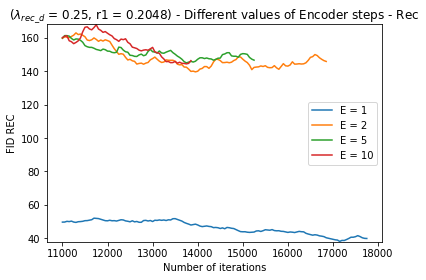

In [24]:
x_1, sample_1, rec_1 = parseTXT_FID(275582)
x_2, sample_2, rec_2 = parseTXT_FID(276684)
x_5, sample_5, rec_5 = parseTXT_FID(276686)
x_10, sample_10, rec_10 = parseTXT_FID(276687)

plot("($\lambda_{rec\_d}$ = 0.25, r1 = 0.2048) - Different values of Encoder steps - Rec", 
     [x_1, x_2, x_5, x_10], 
     [rec_1, rec_2, rec_5, rec_10], 
     [f"E = {1}", f"E = {2}", f"E = {5}", f"E = {10}"],
     xlabel="Number of iterations", 
     ylabel="FID REC",
     filename="ablation-n-step-e-rec",
     encoder=True,
     limit=0.25
)

### LOSS values

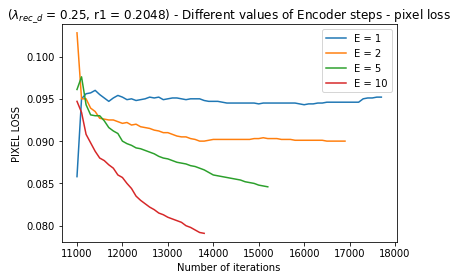

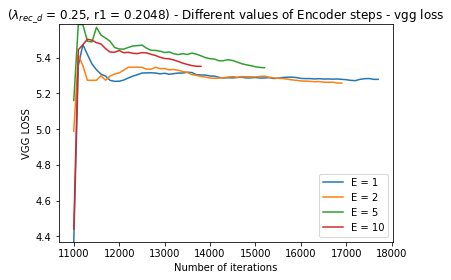

In [25]:
x_1, pix_1, vgg_1, ref_pix_1, ref_vgg_1 = parseTXT_LOSS(275582)
x_2, pix_2, vgg_2, ref_pix_2, ref_vgg_2 = parseTXT_LOSS(276684)
x_3, pix_3, vgg_3, ref_pix_3, ref_vgg_3 = parseTXT_LOSS(276686)
x_4, pix_4, vgg_4, ref_pix_4, ref_vgg_4 = parseTXT_LOSS(276687)


plot("($\lambda_{rec\_d}$ = 0.25, r1 = 0.2048) - Different values of Encoder steps - pixel loss", 
     [x_1, x_2, x_3, x_4], 
     [pix_1, pix_2, pix_3, pix_4], 
     [f"E = {1}", f"E = {2}", f"E = {5}", f"E = {10}"],
     xlabel="Number of iterations", 
     ylabel="PIXEL LOSS",
     filename="ablation-n-step-e-pix-loss",
     limit = 0.001,
     encoder=True
)

plot("($\lambda_{rec\_d}$ = 0.25, r1 = 0.2048) - Different values of Encoder steps - vgg loss", 
     [x_1, x_2, x_3, x_4], 
     [vgg_1, vgg_2, vgg_3, vgg_4], 
     [f"E = {1}", f"E = {2}", f"E = {5}", f"E = {10}"],
     xlabel="Number of iterations", 
     ylabel="VGG LOSS",
     filename="ablation-n-step-e-vgg-loss",
     limit = 0.001,
     encoder=True
)

## Lamba regularization factor
We decide to compare 0.125, 0.25 (base model), 0.5 and 1.0

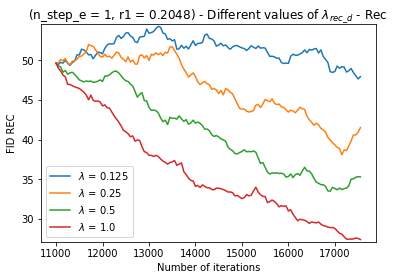

In [26]:
x_0_125, sample_0_125, rec_0_125 = parseTXT_FID(275583)
x_0_25, sample_0_25, rec_0_25 = parseTXT_FID(275582) # Base Model
x_0_5, sample_0_5, rec_0_5 = parseTXT_FID(275584)
x_1, sample_1, rec_1 = parseTXT_FID(275585)

plot("(n_step_e = 1, r1 = 0.2048) - Different values of $\lambda_{rec\_d}$ - Rec", 
     [x_0_125, x_0_25, x_0_5, x_1], 
     [rec_0_125, rec_0_25, rec_0_5, rec_1], 
     [f"$\lambda$ = {0.125}", f"$\lambda$ = {0.25}", f"$\lambda$ = {0.5}", f"$\lambda$ = {1.0}"],
     xlabel="Number of iterations", 
     ylabel="FID REC",
     filename="ablation-lambda-regularization-factor-rec",
     limit=0.25
)

### LOSS Values

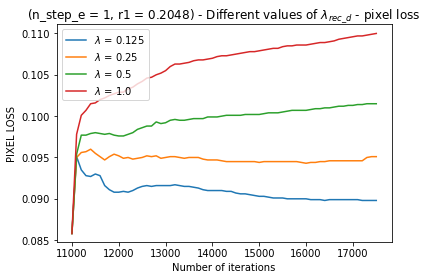

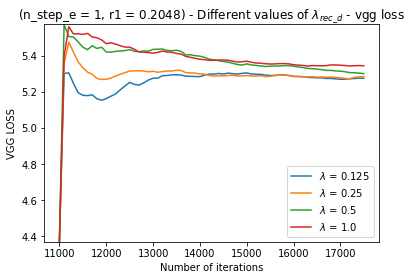

In [27]:
x_1, pix_1, vgg_1, ref_pix_1, ref_vgg_1 = parseTXT_LOSS(275583)
x_2, pix_2, vgg_2, ref_pix_2, ref_vgg_2 = parseTXT_LOSS(275582)
x_3, pix_3, vgg_3, ref_pix_3, ref_vgg_3 = parseTXT_LOSS(275584)
x_4, pix_4, vgg_4, ref_pix_4, ref_vgg_4 = parseTXT_LOSS(275585)


plot("(n_step_e = 1, r1 = 0.2048) - Different values of $\lambda_{rec\_d}$ - pixel loss", 
     [x_1, x_2, x_3, x_4], 
     [pix_1, pix_2, pix_3, pix_4], 
     [f"$\lambda$ = {0.125}", f"$\lambda$ = {0.25}", f"$\lambda$ = {0.5}", f"$\lambda$ = {1.0}"],
     xlabel="Number of iterations", 
     ylabel="PIXEL LOSS",
     filename="ablation-lambda-regularization-factor-pix-loss",
     limit = 0.001
)

plot("(n_step_e = 1, r1 = 0.2048) - Different values of $\lambda_{rec\_d}$ - vgg loss", 
     [x_1, x_2, x_3, x_4], 
     [vgg_1, vgg_2, vgg_3, vgg_4], 
     [f"$\lambda$ = {0.125}", f"$\lambda$ = {0.25}", f"$\lambda$ = {0.5}", f"$\lambda$ = {1.0}"],
     xlabel="Number of iterations", 
     ylabel="VGG LOSS",
     filename="ablation-lambda-regularization-factor-vgg-loss",
     limit = 0.001
)

## Regularization factor
We decide to compare 0.1024, 0.2048 (base model), 1.0 and 5.0

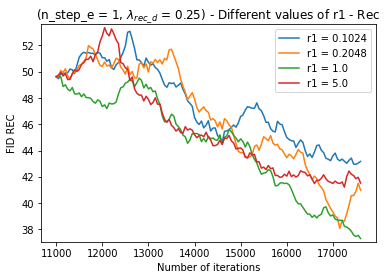

In [28]:
x_0_1024, sample_0_1024, rec_0_1024 = parseTXT_FID(275587)
x_0_2048, sample_0_2048, rec_0_2048 = parseTXT_FID(275582) # Base Model
x_1, sample_1, rec_1 = parseTXT_FID(275633)
x_5, sample_5, rec_5 = parseTXT_FID(282537) # The results of 276679 wasn't the one expected so run an other experiment

plot("(n_step_e = 1, $\lambda_{rec\_d}$ = 0.25) - Different values of r1 - Rec", 
     [x_0_1024, x_0_2048, x_1, x_5], 
     [rec_0_1024, rec_0_2048, rec_1, rec_5], 
     [f"r1 = {0.1024}", f"r1 = {0.2048}", f"r1 = {1.0}", f"r1 = {5.0}"],
     xlabel="Number of iterations", 
     ylabel="FID REC",
     filename="ablation-r1-rec",
     limit=0.25
)

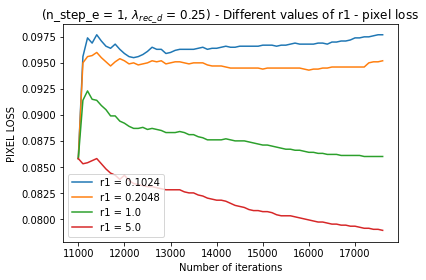

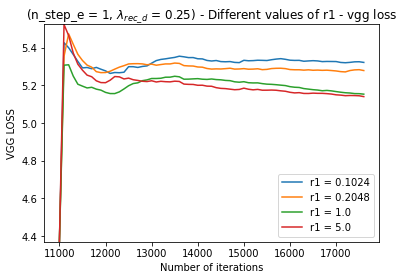

In [29]:
x_1, pix_1, vgg_1, ref_pix_1, ref_vgg_1 = parseTXT_LOSS(275587)
x_2, pix_2, vgg_2, ref_pix_2, ref_vgg_2 = parseTXT_LOSS(275582)
x_3, pix_3, vgg_3, ref_pix_3, ref_vgg_3 = parseTXT_LOSS(275633)
x_4, pix_4, vgg_4, ref_pix_4, ref_vgg_4 = parseTXT_LOSS(282537)

plot("(n_step_e = 1, $\lambda_{rec\_d}$ = 0.25) - Different values of r1 - pixel loss", 
     [x_1, x_2, x_3, x_4], 
     [pix_1, pix_2, pix_3, pix_4], 
     [f"r1 = {0.1024}", f"r1 = {0.2048}", f"r1 = {1.0}", f"r1 = {5.0}"],
     xlabel="Number of iterations", 
     ylabel="PIXEL LOSS",
     filename="ablation-r1-pix-loss",
     limit = 0.001
)

plot("(n_step_e = 1, $\lambda_{rec\_d}$ = 0.25) - Different values of r1 - vgg loss", 
     [x_1, x_2, x_3, x_4], 
     [vgg_1, vgg_2, vgg_3, vgg_4], 
     [f"r1 = {0.1024}", f"r1 = {0.2048}", f"r1 = {1.0}", f"r1 = {5.0}"],
     xlabel="Number of iterations", 
     ylabel="VGG LOSS",
     filename="ablation-r1-vgg-loss",
     limit = 0.001
)